In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Problema 1

#### Codificacion de los colores a desplegar

In [2]:
def activar_canales_color(img, color):
    try:
        img = cv2.imread("imagenp1.jpeg")

        # Dividimos la imagen por canales
        b, g, r = cv2.split(img)

        # Creanos el lienzo con todos los pixeles a 0(negro)
        lienzo = np.zeros_like(img)

        if color == 1:  #Azul
            azul = cv2.merge([lienzo[:, :, 0], lienzo[:, :, 1], b])
            return azul
        elif color == 2:  #Verde
            verde = cv2.merge([lienzo[:, :, 0], g, lienzo[:, :, 2]])
            return verde
        elif color == 3:  #Rojo
            rojo = cv2.merge([r, lienzo[:, :, 1], lienzo[:, :, 2]])
            return rojo
        elif color == 10:  # Rojo y Verde
            rojo_verde = cv2.merge([r, g, lienzo[:, :, 2]])
            return rojo_verde
        elif color == 20:  # Verde y Azul
            verde_azul = cv2.merge([lienzo[:, :, 0], g, b])
            return verde_azul
        elif color == 30:  # Azul y Rojo
            azul_rojo = cv2.merge([r, lienzo[:, :, 1], b])
            return azul_rojo
        else:
            raise ValueError("El valor del parámetro 'color' es inválido. Debe ser 1, 2, 3, 10, 20 o 30.")
    except Exception as e:
        print(f"Error al procesar la imagen: {e}")
        return None



#### Ingreso de los parametros

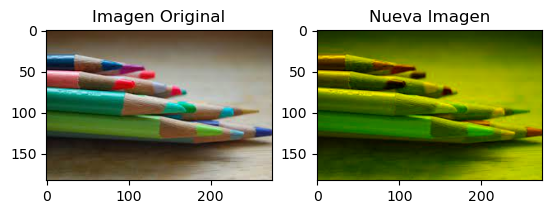

In [3]:
# INGRESO DE LA IMAGEN Y PARAMETRO DE COLOR
imagen_original = "imagenp1.jpeg"
color_activar = 20

try:
    nueva_imagen = activar_canales_color(imagen_original, color_activar)
    if nueva_imagen is not None:
        #imagen original
        plt.subplot(1, 2, 1)
        plt.title("Imagen Original")
        plt.imshow(cv2.cvtColor(cv2.imread(imagen_original), cv2.COLOR_BGR2RGB))

        #imagen procesada
        plt.subplot(1, 2, 2)
        plt.title("Nueva Imagen")
        plt.imshow(cv2.cvtColor(nueva_imagen, cv2.COLOR_BGR2RGB))

        plt.show() 
except ValueError as e:
    print(e)

## Problema 2

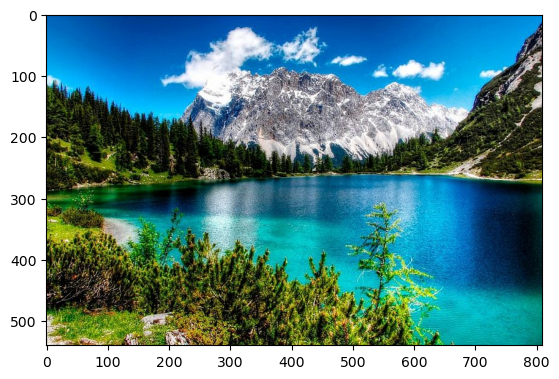

In [4]:
def construir_imagen_color(imagen_gray_azul, imagen_gray_rojo, imagen_gray_verde):
        # Leemos las imagenes en escala de grises
        img_gray_azul = cv2.imread(imagen_gray_azul, cv2.IMREAD_GRAYSCALE)
        img_gray_rojo = cv2.imread(imagen_gray_rojo, cv2.IMREAD_GRAYSCALE)
        img_gray_verde = cv2.imread(imagen_gray_verde, cv2.IMREAD_GRAYSCALE)

        # Se combinan los canales para obtener a imagen a color
        img_color = cv2.merge([img_gray_azul, img_gray_verde, img_gray_rojo])
        return img_color

# Ruta de las imagenes originales
imagen_gray_azul = "imagen1_salida_gray_azul.jpg"
imagen_gray_rojo = "imagen1_salida_gray_rojo.jpg"
imagen_gray_verde = "imagen1_salida_gray_verde.jpg"

imagen_color = construir_imagen_color(imagen_gray_azul, imagen_gray_rojo, imagen_gray_verde)

# Imagen final
plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
plt.show()



## Problema 3

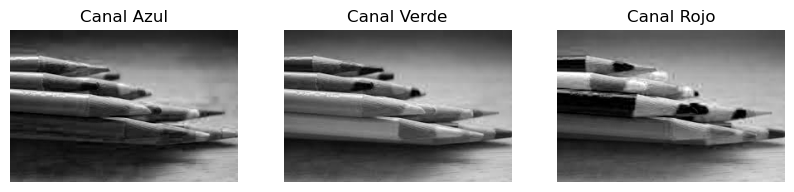

In [11]:
imagen_original = "imagenp1.jpeg"
def crear_escala_de_grises_3d(imagen_original):
    # Lee la imagen original en color usando OpenCV
    img_color = cv2.imread(imagen_original)

    # Separa los canales de color
    b, g, r = cv2.split(img_color)

    # Crea imágenes en escala de grises para cada canal de color
    img_gray_blue = cv2.merge([b, b, b])
    img_gray_green = cv2.merge([g, g, g])
    img_gray_red = cv2.merge([r, r, r])

    # Muestra las imágenes en una matriz de subplots
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_gray_blue, cv2.COLOR_BGR2RGB))
    plt.title("Canal Azul")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img_gray_green, cv2.COLOR_BGR2RGB))
    plt.title("Canal Verde")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(img_gray_red, cv2.COLOR_BGR2RGB))
    plt.title("Canal Rojo")
    plt.axis('off')

    plt.show()

crear_escala_de_grises_3d(imagen_original)


## Problema 4

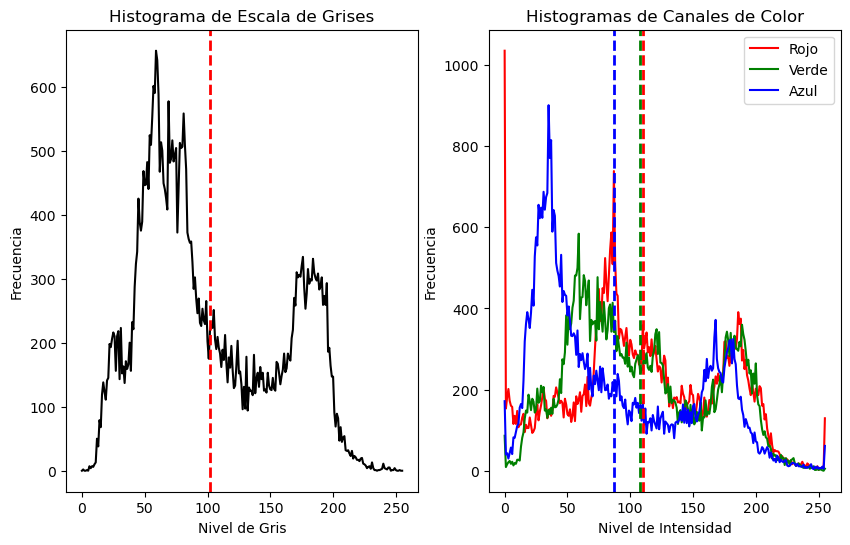

In [19]:
imagen = "imagenp1.jpeg"
def calcular_histograma_gris_aritmetico(imagen):
    # Cargamos la imagen en escala de grises
    img = plt.imread(imagen)
    img_gris = np.mean(img, axis=2).astype(np.uint8)

    # Calculamos el histograma y la media de la distribucion
    hist_gris, bins_gris = np.histogram(img_gris.ravel(), bins=256, range=[0, 256])
    media_gris = np.mean(img_gris)

    # Histograma en escala de grises
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(hist_gris, color='black')
    plt.axvline(media_gris, color='red', linestyle='dashed', linewidth=2)
    plt.title("Histograma de Escala de Grises")
    plt.xlabel("Nivel de Gris")
    plt.ylabel("Frecuencia")

    # Calculamos los histogramas de los canales a color y las medias de la distribucion
    r_channel, g_channel, b_channel = img[:,:,0], img[:,:,1], img[:,:,2]
    hist_r, bins_r = np.histogram(r_channel.ravel(), bins=256, range=[0, 256])
    hist_g, bins_g = np.histogram(g_channel.ravel(), bins=256, range=[0, 256])
    hist_b, bins_b = np.histogram(b_channel.ravel(), bins=256, range=[0, 256])
    media_r, media_g, media_b = np.mean(r_channel), np.mean(g_channel), np.mean(b_channel)

    # Histogramas
    plt.subplot(1, 2, 2)
    plt.plot(hist_r, color='red', label='Rojo')
    plt.plot(hist_g, color='green', label='Verde')
    plt.plot(hist_b, color='blue', label='Azul')
    plt.axvline(media_r, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(media_g, color='green', linestyle='dashed', linewidth=2)
    plt.axvline(media_b, color='blue', linestyle='dashed', linewidth=2)
    plt.title("Histogramas de Canales de Color")
    plt.xlabel("Nivel de Intensidad")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()
calcular_histograma_gris_aritmetico(imagen)